In [1]:
import numpy as np 
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Data\\unicorn_companies.csv')

In [3]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


**Finding out Shape of the Dataframe**

In [4]:
df.shape

(1074, 10)

**Get Basic Information about the Dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


**Summary Statistics of the Data**

In [5]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


**Convert Date Joined column to datetime**

In [7]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

C:\Users\asada\AppData\Local\Temp\ipykernel_5224\2593295292.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


**Creating a new column Called Year Joined**

In [9]:
df['Year Joined'] = df['Date Joined'].dt.year

In [10]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


New column has been Added.

**Taking Random Sample of Data for further Evaluations**

In [11]:
sampled = df.sample(n = 50, random_state=42)

In [13]:
sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 542 to 342
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           50 non-null     object        
 1   Valuation         50 non-null     object        
 2   Date Joined       50 non-null     datetime64[ns]
 3   Industry          50 non-null     object        
 4   City              50 non-null     object        
 5   Country/Region    50 non-null     object        
 6   Continent         50 non-null     object        
 7   Year Founded      50 non-null     int64         
 8   Funding           50 non-null     object        
 9   Select Investors  50 non-null     object        
 10  Year Joined       50 non-null     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 4.5+ KB


**Visualizing How much time it took companies to reach unicorn status**

In [14]:
sampled['year_till_unicorn'] = sampled['Year Joined'] - sampled['Year Founded']

In [16]:
grouped = (sampled[['Industry', 'year_till_unicorn']]
           .groupby('Industry')
           .max()
           .sort_values('year_till_unicorn'))
grouped

,year_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


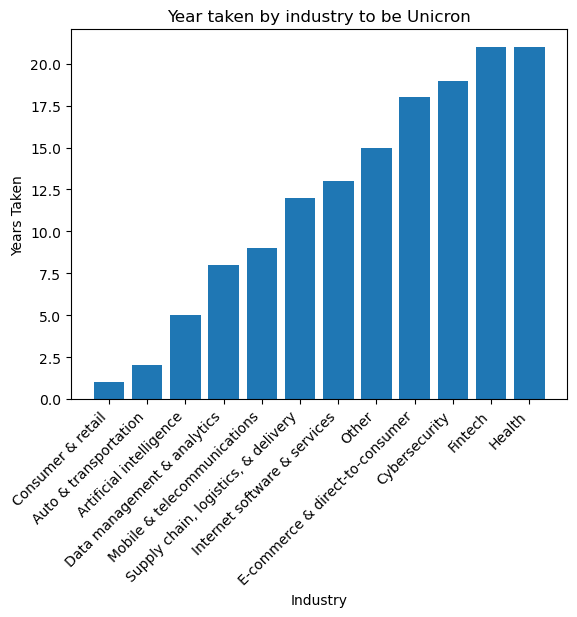

In [17]:
plt.bar(grouped.index, grouped['year_till_unicorn'])
plt.title("Year taken by industry to be Unicron")
plt.xlabel("Industry")
plt.ylabel("Years Taken")
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

**Visulizing the maximum unicorn company valuation per industry**

In [19]:
sampled['valuation_billions'] = sampled['Valuation']
sampled['valuation_billions'] = (sampled['valuation_billions']
                                 .str.replace('$', "", regex = False)
                                 .str.replace('B', "", regex = False)
                                 .astype(int)
                                 )
sampled.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,year_till_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


In [21]:
valuation = (sampled[['Industry','valuation_billions']]
             .groupby('Industry')
             .max()
             .sort_values('valuation_billions'))
valuation

,valuation_billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


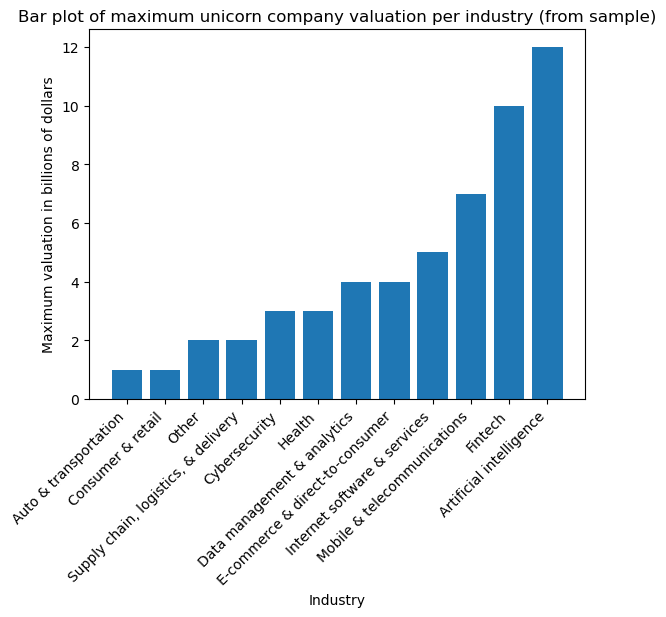

In [24]:
plt.bar(valuation.index, valuation['valuation_billions'])
plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation = 45, horizontalalignment = 'right' )
plt.show()